In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the stream shapefile

In [2]:
data = gpd.read_file(r'allstreams_spatialjoined.shp') #read in the shapefile, just streams that are joined with HUC data from the USGS

### What does the data table look like?

In [3]:
data.head() 

,OBJECTID_1,Join_Count,TARGET_FID,JOIN_FID,OBJECTID_2,OBJECTID,GNIS_Name,Stream_Ord,Major_Stre,Region,...,Ctlg_Unit,Shape_Leng,STREAM_MI,HUC_8,HU_2_NAME,HU_4_NAME,HU_6_NAME,HU_8_NAME,Shape_Le_1,geometry
0,1,1,0,83,1,1,Basin Creek,1,0,16,...,01,0.062562,3.584091,16020101,Great Basin,Great Salt Lake,Weber,Upper Weber,0.232788,(LINESTRING Z (-111.0465344257231 41.029549510...
1,2,1,1,83,2,2,Chalk Creek,2,0,16,...,01,0.026508,1.553170,16020101,Great Basin,Great Salt Lake,Weber,Upper Weber,0.232788,(LINESTRING Z (-111.0335918729666 41.000942001...
2,3,1,2,58,3,5,Leeds Creek,1,0,16,...,02,0.042963,2.344417,16010102,Great Basin,Bear,Upper Bear,Central Bear,2.359471,(LINESTRING Z (-110.9390334028692 41.928801068...
3,4,1,3,67,4,6,Wasatch Creek,0,0,16,...,01,0.052438,2.898974,16010101,Great Basin,Bear,Upper Bear,Upper Bear,4.015696,(LINESTRING Z (-111.0466643543764 41.249437404...
4,5,1,4,67,5,7,Sage Creek,0,0,16,...,01,0.055495,3.241466,16010101,Great Basin,Bear,Upper Bear,Upper Bear,4.015696,(LINESTRING Z (-111.0354332717281 41.135757267...


### Reproject the data and grab contextily for a basemap

In [4]:
data = data.to_crs(epsg=3857) #reproject the data to web mercator

In [5]:
#let's just snag a basemap to plot the shapefile on so it's a nice looking map
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/toner/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

### Plot the data and play with visualizing different features

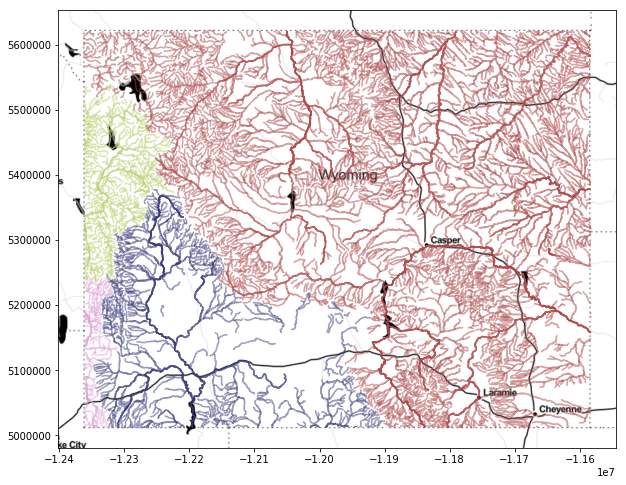

In [6]:
ax = data.plot(figsize=(10, 10), alpha=0.5, column='HU_2_NAME', cmap='tab20b_r') #if you change the column you change the coloring!
add_basemap(ax, zoom=7)